# **3-D FDTD (PEC Boundary)**

### *Code*

***Simulation***

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
c = 3e+8            # speed of light (m/s)
eps0 = 8.85e-12     # free space permittivity
mu0 = 1.26e-6       # free space permeability

# FDTD Variables
dx, dy, dz = 1e-3, 1e-3, 1e-3                           # spatial step (m)
C = 0.99                                                # courant factor
dt = C / (c * np.sqrt((1/dx)**2+(1/dy)**2+(1/dz)**2))   # time step (s)
sx, sy, sz = 30, 40, 10                                 # size of cell
nt = 8192                                               # number of time steps

# Gaussian Source Coefficients
E_0 = 1                                     # amplitude
n_T = 3                                     # time delay
BW = 15e+9                                  # bandwidth (Hz)
T = np.sqrt(2 * np.log(2)) / (np.pi * BW)   # (s)

# Initialize E, H field
Ex = np.zeros((sx+1, sy+1, sz+1))   # E field of x direction (0-30, 0-40, 0-10)
Ey = np.zeros((sx+1, sy+1, sz+1))   # E field of y direction (0-30, 0-40, 0-10)
Ez = np.zeros((sx+1, sy+1, sz+1))   # E field of z direction (0-30, 0-40, 0-10)

Hx = np.zeros((sx, sy, sz))         # H field of x direction (0.5-29.5, 0.5-39.5, 0.5-9.5)
Hy = np.zeros((sx, sy, sz))         # H field of y direction (0.5-29.5, 0.5-39.5, 0.5-9.5)
Hz = np.zeros((sx, sy, sz))         # H field of z direction (0.5-29.5, 0.5-39.5, 0.5-9.5)

Ez_pos = np.empty(nt)   # E field of z direction at (12, 3, 10)

# Run FDTD for 8192 time steps
for n in range(1, nt+1):

    # Gaussian Source
    pulse = E_0 * np.exp(-(((n * dt - n_T * T) / T))**2)

    # Update E everywhere
    for i in range(1, sx):
        for j in range(1, sy):
            for k in range(1, sz):
                Ex[i,j,k] += (dt / eps0) * (((Hz[i,j,k] - Hz[i,j-1,k]) / dy) - ((Hy[i,j,k] - Hy[i,j,k-1]) / dz))
                Ey[i,j,k] += (dt / eps0) * (((Hx[i,j,k] - Hx[i,j,k-1]) / dz) - ((Hz[i,j,k] - Hz[i-1,j,k]) / dx))
                Ez[i,j,k] += (dt / eps0) * (((Hy[i,j,k] - Hy[i-1,j,k]) / dx) - ((Hx[i,j,k] - Hx[i,j-1,k]) / dy))

    # Ez(3,3,3) = Ez(3,3,3) + pulse
    Ez[2,2,2] += pulse

    # Update H everywhere
    for i in range(sx):
        for j in range(sy):
            for k in range(sz):
                Hx[i,j,k] += -(dt / mu0) * (((Ez[i,j+1,k] - Ez[i,j,k]) / dy) - ((Ey[i,j,k+1] - Ey[i,j,k]) / dz))
                Hy[i,j,k] += -(dt / mu0) * (((Ex[i,j,k+1] - Ex[i,j,k]) / dz) - ((Ez[i+1,j,k] - Ez[i,j,k]) / dx))
                Hz[i,j,k] += -(dt / mu0) * (((Ey[i+1,j,k] - Ey[i,j,k]) / dx) - ((Ex[i,j+1,k] - Ex[i,j,k]) / dy))

    # Save Ez(n) at time steps at the observation position (12, 3, 10)
    Ez_pos[n-1] = Ez[11,2,9]
    

***Visualization***

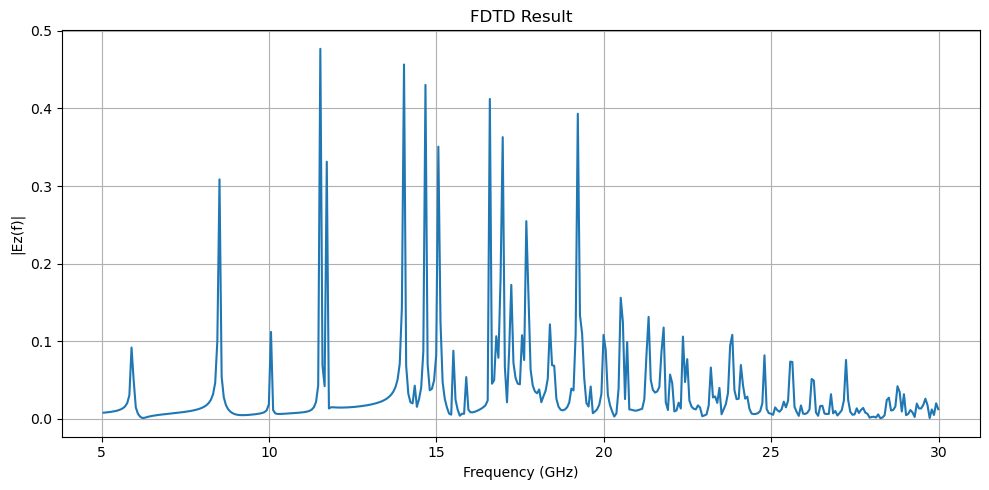

In [33]:
# Calculate the resonance frequencies using DFT (range: 5 - 30 GHz)

# Fourier Transform
Ez_freq = np.fft.fft(Ez_pos)
freqs = np.fft.fftfreq(nt, dt)  # Hz

# Frequency Range 5 - 30 GHz
idx = np.where((freqs >= 5e9) & (freqs <= 30e9))
freqs_ghz = freqs[idx] / 1e9    # Hz to GHz
Ez_mag = np.abs(Ez_freq[idx])   # Ez magnitude

# Plot
plt.figure(figsize=(10, 5))
plt.plot(freqs_ghz, Ez_mag)
plt.xlabel("Frequency (GHz)")
plt.ylabel("|Ez(f)|")
plt.title("FDTD Result")
plt.grid(True)
plt.tight_layout()
plt.show()

### *Result*

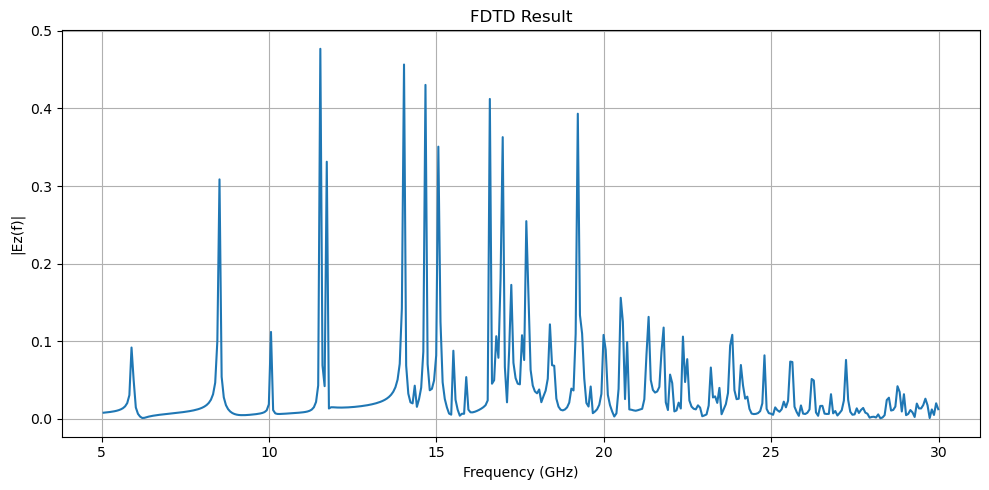